# Scratch Implementation Of Neural Network Using Core Python , Numpy and Pandas

In [238]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import dtype

### Data Processing Using Pandas

In [239]:
#Loading Of Data
data=pd.read_csv(r'KaggleV2-May-2016.csv')
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


### Checking about Appointment Day

In [240]:
data.AppointmentDay.unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

In [241]:
#Converting the data in ScheduledDay and AppointmentDay in datetime datatype so that we can use them
data.ScheduledDay=pd.to_datetime(data.ScheduledDay,utc=True)
data.AppointmentDay=pd.to_datetime(data.AppointmentDay,utc=True)

In [242]:
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No


### According to me Days Between The AppointmentDay and ScheduledDay can be important for No-Show

In [243]:
#How many days are taken for booking can be helpful for No-Show
data['DaysBetween']=(data['AppointmentDay'].dt.normalize()-data['ScheduledDay'].dt.normalize()).dt.days
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DaysBetween
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,35
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,35
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,41
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,41


In [244]:
#Checking Whether repeatedly same patient is there which is regularly not attaining the appointment or attaining
no=data['Neighbourhood'].nunique()
print(no)

81


### After Checking Which Features Are Important , Droping Of Unwanted Features

In [245]:
data=data.drop(columns=['AppointmentID','PatientId','AppointmentDay','ScheduledDay'])

In [246]:
data

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DaysBetween
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
...,...,...,...,...,...,...,...,...,...,...,...
110522,F,56,MARIA ORTIZ,0,0,0,0,0,1,No,35
110523,F,51,MARIA ORTIZ,0,0,0,0,0,1,No,35
110524,F,21,MARIA ORTIZ,0,0,0,0,0,1,No,41
110525,F,38,MARIA ORTIZ,0,0,0,0,0,1,No,41


Now, Doing String Encoding For Features Like Gender,Neighbourhood,No-Show

In [247]:
diff_values=data['Gender'].unique()
print(diff_values)

['F' 'M']


In [248]:
i=1
for idx in diff_values:
    data.loc[data['Gender']==idx,'Gender']=i
    print('The Gender ',idx,' is represented by ',i)
    i=i+1
data

The Gender  F  is represented by  1
The Gender  M  is represented by  2


,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DaysBetween
0,1,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,2,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,1,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,1,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,1,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
...,...,...,...,...,...,...,...,...,...,...,...
110522,1,56,MARIA ORTIZ,0,0,0,0,0,1,No,35
110523,1,51,MARIA ORTIZ,0,0,0,0,0,1,No,35
110524,1,21,MARIA ORTIZ,0,0,0,0,0,1,No,41
110525,1,38,MARIA ORTIZ,0,0,0,0,0,1,No,41


In [249]:
diff_values=data['Neighbourhood'].unique()
print(diff_values)

['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃO JOSÉ' 'REDENÇÃO' 'SANTA CLARA' 'CENTRO' 'PARQUE MOSCOSO'
 'DO MOSCOSO' 'SANTOS DUMONT' 'CARATOÍRA' 'ARIOVALDO FAVALESSA'
 'ILHA DO FRADE' 'GURIGICA' 'JOANA D´ARC' 'CONSOLAÇÃO' 'PRAIA DO CANTO'
 'BOA VISTA' 'MORADA DE CAMBURI' 'SANTA LUÍZA' 'SANTA LÚCIA'
 'BARRO VERMELHO' 'ESTRELINHA' 'FORTE SÃO JOÃO' 'FONTE GRANDE'
 'ENSEADA DO SUÁ' 'SANTOS REIS' 'PIEDADE' 'JESUS DE NAZARETH'
 'SANTA TEREZA' 'CRUZAMENTO' 'ILHA DO PRÍNCIPE' 'ROMÃO' 'COMDUSA'


In [250]:
import pandas as pd

neigh_counts = data['Neighbourhood'].value_counts()
neigh_mapping = {neigh: rank+1 for rank, neigh in enumerate(neigh_counts.index[::-1])}
data['Neighbourhood'] = data['Neighbourhood'].map(neigh_mapping)

for neigh, num in neigh_mapping.items():
    print(f"The Neighbourhood '{neigh}' is represented by {num}")

The Neighbourhood 'PARQUE INDUSTRIAL' is represented by 1
The Neighbourhood 'ILHAS OCEÂNICAS DE TRINDADE' is represented by 2
The Neighbourhood 'AEROPORTO' is represented by 3
The Neighbourhood 'ILHA DO FRADE' is represented by 4
The Neighbourhood 'ILHA DO BOI' is represented by 5
The Neighbourhood 'PONTAL DE CAMBURI' is represented by 6
The Neighbourhood 'MORADA DE CAMBURI' is represented by 7
The Neighbourhood 'NAZARETH' is represented by 8
The Neighbourhood 'SEGURANÇA DO LAR' is represented by 9
The Neighbourhood 'UNIVERSITÁRIO' is represented by 10
The Neighbourhood 'HORTO' is represented by 11
The Neighbourhood 'SANTA HELENA' is represented by 12
The Neighbourhood 'ENSEADA DO SUÁ' is represented by 13
The Neighbourhood 'FRADINHOS' is represented by 14
The Neighbourhood 'ANTÔNIO HONÓRIO' is represented by 15
The Neighbourhood 'ARIOVALDO FAVALESSA' is represented by 16
The Neighbourhood 'DE LOURDES' is represented by 17
The Neighbourhood 'COMDUSA' is represented by 18
The Neighbourh

In [251]:
data

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DaysBetween
0,1,62,78,0,1,0,0,0,0,No,0
1,2,56,78,0,0,0,0,0,0,No,0
2,1,62,32,0,0,0,0,0,0,No,0
3,1,8,6,0,0,0,0,0,0,No,0
4,1,56,78,0,1,1,0,0,0,No,0
...,...,...,...,...,...,...,...,...,...,...,...
110522,1,56,80,0,0,0,0,0,1,No,35
110523,1,51,80,0,0,0,0,0,1,No,35
110524,1,21,80,0,0,0,0,0,1,No,41
110525,1,38,80,0,0,0,0,0,1,No,41


In [252]:
diff_values=data['No-show'].unique()
print(diff_values)

['No' 'Yes']


In [253]:
i=0
for idx in diff_values:
    data.loc[data['No-show']==idx,'No-show']=i
    print('The No-show ',idx,' is represented by ',i)
    i=i+1

The No-show  No  is represented by  0
The No-show  Yes  is represented by  1


### Now we change the Datatype to Int For all Features

In [254]:
for columns in data.columns:
    data[columns]=data[columns].astype('int')

In [255]:
print(data.dtypes)

Gender           int64
Age              int64
Neighbourhood    int64
Scholarship      int64
Hipertension     int64
Diabetes         int64
Alcoholism       int64
Handcap          int64
SMS_received     int64
No-show          int64
DaysBetween      int64
dtype: object


In [256]:
#According To Me , There Is No Need Of Normalization as scale of mostly features are nearer

### Shuffling of Data

In [257]:
data=data.sample(frac=1,random_state=42).reset_index(drop=True)

### Splitting Of Data In x and y

In [258]:
#Transfer the data in x and y
x=data.drop(columns=['No-show'])
y=data['No-show']

In [259]:
x

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,DaysBetween
0,1,20,45,0,0,0,0,0,0,0
1,1,37,79,0,0,0,0,0,1,35
2,1,38,80,0,0,0,0,0,0,8
3,1,24,70,0,0,0,0,0,1,31
4,1,41,80,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
110522,1,63,67,0,1,1,0,0,1,5
110523,2,31,80,0,0,0,0,0,0,36
110524,1,38,64,0,0,0,0,0,0,6
110525,1,18,58,1,0,0,0,0,0,0


In [260]:
y

0         0
1         0
2         1
3         1
4         0
         ..
110522    0
110523    0
110524    0
110525    0
110526    0
Name: No-show, Length: 110527, dtype: int64

### Now Finally Splitting The Data In Training Set, Validation Set ,and Testing Set

In [261]:
train_ratio=0.7
val_ratio=0.15
test_ratio=0.15

total=len(data)

train_size = int(total * train_ratio)
val_size = int(total * val_ratio)
test_size = total - train_size - val_size  # To cover any rounding issues

x_train = x[:train_size]
x_val = x[train_size:train_size + val_size]
x_test = x[train_size + val_size:]

y_train = y[:train_size]
y_val = y[train_size:train_size + val_size]
y_test = y[train_size + val_size:]

### Converting The Dataframe In Pandas To Numpy Array

In [262]:
x_train_numpy=x_train.to_numpy()
x_val_numpy=x_val.to_numpy()
x_test_numpy=x_test.to_numpy()
y_train_numpy=y_train.to_numpy()
y_val_numpy=y_val.to_numpy()
y_test_numpy=y_test.to_numpy()

In [263]:
print(x_train_numpy.shape)
print(x_val_numpy.shape)
print(x_test_numpy.shape)

(77368, 10)
(16579, 10)
(16580, 10)


In [264]:
y_train_numpy=y_train_numpy.reshape(-1,1)
y_val_numpy=y_val_numpy.reshape(-1,1)
y_test_numpy=y_test_numpy.reshape(-1,1)
print(y_train_numpy.shape)
print(y_val_numpy.shape)
print(y_test_numpy.shape)

(77368, 1)
(16579, 1)
(16580, 1)


# Part-2 Neural Network Using Core Python and Numpy

### Now Set Number Of Layers, Initialization of Weights Using He Initialization Method

In [265]:
L=3
m=77368
n=[10,64,32,1]
std1=(2/10)**0.5
std2=(2/64)**0.5
std3=(2/32)**0.5
W1 = np.random.randn(n[1], n[0])*std1
W2 = np.random.randn(n[2], n[1])*std2
W3 = np.random.randn(n[3], n[2])*std3
b1 = np.zeros((n[1], 1))
b2 = np.zeros((n[2], 1))
b3 = np.zeros((n[3], 1))
y_train_numpy = y_train_numpy.reshape(1,-1)
x_train_numpy = x_train_numpy.T
print(x_train_numpy.shape)
print(y_train_numpy.shape)

(10, 77368)
(1, 77368)


In [266]:
print(W1)
print(W2)
print(W3)
print(b1)
print(b2)
print(b3)

[[ 8.79252665e-01  1.48432725e-03  2.70699870e-01  2.10806329e-01
   5.19653060e-01  8.81535552e-01 -4.48878874e-01  5.50386026e-01
   1.30334265e+00  3.37902548e-01]
 [-1.05280028e-01 -1.20380169e-01  8.63220911e-01  3.35587560e-01
   4.26651223e-01  3.37885175e-01 -6.59946339e-01 -7.41830936e-01
  -9.18611759e-01 -7.17476600e-02]
 [-4.75658404e-01  2.06960141e-01  5.57405944e-01  3.70973034e-01
   2.09507726e-01 -1.87625617e-01  6.41453716e-01 -4.88645993e-01
  -2.79854395e-01 -5.43113783e-02]
 [ 1.69345675e-01  8.58480311e-01  2.19272914e-01 -3.90865621e-01
   4.24396721e-01 -1.24945109e-01 -9.16194849e-01  1.81063469e-01
   3.09609827e-01 -2.70552325e-01]
 [-1.91937201e-01  4.67141714e-01 -5.24499790e-01  1.04528995e-01
   4.78378381e-01  7.32325741e-02 -3.68226456e-01  1.68306416e-01
   5.67702351e-01  8.86426274e-01]
 [-1.86823761e-01  2.16202089e-01 -8.41214525e-01  4.48702493e-01
  -4.90433587e-01 -6.08134899e-01 -5.86790959e-02 -2.37866557e-01
  -3.79083361e-01  3.98633514e-01

### Code For Calculating The Accuracy, F1-Score ,PR_AUC

In [267]:
def accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    t = len(y_true[0])
    return correct/t

In [268]:
def f1_score(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    precision = TP / (TP + FP + 1e-10)
    recall = TP / (TP + FN + 1e-10)

    f1 = 2 * precision * recall / (precision + recall + 1e-10)
    return f1

In [269]:
def pr_auc(y_true, y_probs):
    y_true = np.array(y_true).flatten()
    y_probs = np.array(y_probs).flatten()

    # Sort by predicted probabilities
    sorted_indices = np.argsort(-y_probs)
    y_true_sorted = y_true[sorted_indices]
    y_probs_sorted = y_probs[sorted_indices]

    precision = []
    recall = []

    TP = 0
    FP = 0
    FN = np.sum(y_true == 1)

    for i in range(len(y_true_sorted)):
        if y_true_sorted[i] == 1:
            TP += 1
            FN -= 1
        else:
            FP += 1

        p = TP / (TP + FP + 1e-10)
        r = TP / (TP + FN + 1e-10)
        precision.append(p)
        recall.append(r)

    # Trapezoidal rule to compute AUC
    auc = 0.0
    for i in range(1, len(precision)):
        auc += (recall[i] - recall[i-1]) * (precision[i] + precision[i-1]) / 2
    return auc


In [270]:
def confusion_matrix(y_true, y_pred):
    # Compute confusion matrix components
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    # Create matrix: rows = actual, columns = predicted
    cm = np.array([[TN, FP],
                   [FN, TP]])

    # Plotting
    fig, ax = plt.subplots()
    im = ax.imshow(cm, cmap='Blues')

    # Labels and ticks
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['Predicted 0', 'Predicted 1'])
    ax.set_yticklabels(['Actual 0', 'Actual 1'])

    # Add values in cells
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=12)

    # Titles and labels
    ax.set_title('Confusion Matrix (Binary Classification)')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    plt.colorbar(im)
    plt.tight_layout()
    plt.show()

### Code For Calculating Binary Cross Entropy Loss Using Logits For Numerical Stability

In [271]:
def cost(y_true,logit):
    # Ensure float for stability
    y_true = y_true.astype(np.float64)
    logit = logit.astype(np.float64)

    # Stable computation using the "log-sum-exp" trick
    loss = np.mean(np.maximum(logit, 0) - logit * y_true + np.log1p(np.exp(-np.abs(logit))))

    return loss

### Code For Sigmoid Function (Numerically Stable Version)

In [272]:
def g(z):
    """
    Numerically stable sigmoid function.
    """
    z = np.array(z, dtype=np.float64)  # ensure float64 for precision
    out = np.empty_like(z)

    # For z >= 0
    pos_mask = z >= 0
    out[pos_mask] = 1 / (1 + np.exp(-z[pos_mask]))

    # For z < 0
    neg_mask = ~pos_mask
    exp_z = np.exp(z[neg_mask])
    out[neg_mask] = exp_z / (1 + exp_z)

    return out

In [273]:
def relu(z):
    return np.maximum(0,z)

In [274]:
def relu_derivative(z):
    dz=np.where(z>0,1,0)
    return dz

### Code For Forward And Backward Prop and Also Training

In [275]:
def feed_forward(A0):
    z1=W1 @ A0 + b1
    A1=relu(z1)
    dA1_dZ1=relu_derivative(z1)

    z2=W2 @ A1 + b2
    A2=relu(z2)
    dA2_dZ2 = relu_derivative(z2)

    z3=W3 @ A2 + b3
    A3=g(z3)

    cache={
        "logit":z3,
        "A0":A0,
        "A1":A1,
        "A2":A2,
        "dA1_dZ1":dA1_dZ1,
        "dA2_dZ2":dA2_dZ2,
    }
    return A3 , cache

In [276]:
def back_prop_layer3(y_hat,Y,m,A2,W3):
    A3 = y_hat
    # step 1. calculate dC/dZ3 using shorthand we derived earlier
    dC_dZ3 = (1/m) * (A3 - Y)
    assert dC_dZ3.shape == (n[3], m)


    # step 2. calculate dC/dW3 = dC/dZ3 * dZ3/dW3
    #   we matrix multiply dC/dZ3 with (dZ3/dW3)^T
    dZ3_dW3 = A2
    assert dZ3_dW3.shape == (n[2], m)

    dC_dW3 = dC_dZ3 @ dZ3_dW3.T
    assert dC_dW3.shape == (n[3], n[2])

    # step 3. calculate dC/db3 = np.sum(dC/dZ3, axis=1, keepdims=True)
    dC_db3 = np.sum(dC_dZ3, axis=1, keepdims=True)
    assert dC_db3.shape == (n[3], 1)

    # step 4. calculate propagator dC/dA2 = dC/dZ3 * dZ3/dA2
    dZ3_dA2 = W3
    dC_dA2 = W3.T @ dC_dZ3
    assert dC_dA2.shape == (n[2], m)

    return dC_dW3, dC_db3, dC_dA2

In [277]:
def back_prop_layer2(propagator_dA2_dZ2,propagator_dC_dA2,m,A1,A2,W2):
    # step 1. calculate dC_dZ2 :
    dC_dZ2=propagator_dC_dA2 * propagator_dA2_dZ2
    assert dC_dZ2.shape==(n[2],m)

    # step 2. calculate dC_dW2 :
    dZ2_dW2=A1
    assert dZ2_dW2.shape==(n[1],m)

    dC_dW2=dC_dZ2 @ dZ2_dW2.T
    assert dC_dW2.shape == (n[2],n[1])

    # step 3. calculate dC_db2 :
    dC_db2=np.sum(dC_dZ2,axis=1,keepdims=True)
    assert dC_db2.shape == (n[2],1)

    # step 4. calculate dC_dA1 :
    dZ2_dA1=W2
    dC_dA1=W2.T @ dC_dZ2
    assert dC_dA1.shape == (n[1],m)

    return dC_dW2, dC_db2, dC_dA1

In [278]:
def back_prop_layer1(propagated_dA1_dZ1,propagated_dC_dA1,m,A0,A1,W1):
    # step 1. calculate dC_dZ1 :
    dC_dZ1=propagated_dC_dA1 * propagated_dA1_dZ1
    assert dC_dZ1.shape == (n[1],m)

    # step 2. calculate dC_dW1 :
    dZ1_dW1=A0
    assert dZ1_dW1.shape == (n[0],m)

    dC_dW1=dC_dZ1 @ dZ1_dW1.T
    assert dC_dW1.shape == (n[1],n[0])

    # step 3. calculate dC_db1 :
    dC_db1=np.sum(dC_dZ1,axis=1,keepdims=True)
    assert dC_db1.shape == (n[1],1)

    return dC_dW1, dC_db1

In [279]:
def train():
    # must use global keyword in order to modify global variables
    global W3, W2, W1, b3, b2, b1

    epochs = 2000 # training for 1000 iterations
    alpha = 0.0001 # set learning rate to 0.1
    costs = [] # list to store costs
    for e in range(epochs):
      # 1. FEED FORWARD
      y_hat, cache = feed_forward(x_train_numpy)

      # 2. COST CALCULATION
      logit=cache["logit"]
      error = cost(y_train_numpy,logit)
      costs.append(error)

      # 3. BACKPROP CALCULATIONS

      dA2_dZ2=cache["dA2_dZ2"]
      dA1_dZ1=cache["dA1_dZ1"]


      dC_dW3, dC_db3, dC_dA2 = back_prop_layer3(
               y_hat,
               y_train_numpy,
               m,
               A2=cache["A2"],
               W3=W3
      )
      dC_dW2, dC_db2, dC_dA1 = back_prop_layer2(
                dA2_dZ2,
                dC_dA2,
                m,
                A1=cache["A1"],
                A2=cache["A2"],
                W2=W2
      )
      dC_dW1, dC_db1 = back_prop_layer1(
                dA1_dZ1,
                dC_dA1,
                m,
                A0=cache["A0"],
                A1=cache["A1"],
                W1=W1
      )

      # 4. UPDATE WEIGHTS
      W3 = W3 - (alpha * dC_dW3)
      W2 = W2 - (alpha * dC_dW2)
      W1 = W1 - (alpha * dC_dW1)

      b3 = b3 - (alpha * dC_db3)
      b2 = b2 - (alpha * dC_db2)
      b1 = b1 - (alpha * dC_db1)


      if e % 20 == 0:
        print(f"epoch {e}: cost = {error}")

    return costs

### Now Training Process Which Approximately Take 25 min for Convergence

In [280]:
cost=train()

epoch 0: cost = 4.751613682647416
epoch 20: cost = 1.1651257299117197
epoch 40: cost = 0.921739508765274
epoch 60: cost = 0.8988335598411861
epoch 80: cost = 0.8776179054435801
epoch 100: cost = 0.8578859344886497
epoch 120: cost = 0.8393990819735667
epoch 140: cost = 0.8220799507819864
epoch 160: cost = 0.8058943680513033
epoch 180: cost = 0.7907601719202726
epoch 200: cost = 0.7766428974369652
epoch 220: cost = 0.763322008740362
epoch 240: cost = 0.750741330695983
epoch 260: cost = 0.7388196640342052
epoch 280: cost = 0.7275195412969974
epoch 300: cost = 0.7167935951080563
epoch 320: cost = 0.7066539290822245
epoch 340: cost = 0.6971012053551822
epoch 360: cost = 0.6880997438426945
epoch 380: cost = 0.6796380739592542
epoch 400: cost = 0.6716624482434229
epoch 420: cost = 0.6641577249870875
epoch 440: cost = 0.6570405697865865
epoch 460: cost = 0.6503161463384662
epoch 480: cost = 0.644062745065791
epoch 500: cost = 0.6382043804168046
epoch 520: cost = 0.6327255243233958
epoch 540: c

In [281]:
y_hat_train, cache = feed_forward(x_train_numpy)
x_val_numpy=x_val_numpy.T
y_val_numpy=y_val_numpy.reshape(1,-1)
m=16579
y_hat_val , cache1 = feed_forward(x_val_numpy)
x_test_numpy=x_test_numpy.T
y_test_numpy=y_test_numpy.reshape(1,-1)
m=16580
y_hat_test , cache2 = feed_forward(x_test_numpy)

In [282]:
y_pre_train=(y_hat_train >= 0.25).astype(int)
y_pre_val=(y_hat_val >= 0.25).astype(int)
y_pre_test=(y_hat_test >= 0.25).astype(int)

In [283]:
accuracy_train=accuracy(y_train_numpy, y_pre_train)
accuracy_val=accuracy(y_val_numpy, y_pre_val)
accuracy_test=accuracy(y_test_numpy, y_pre_test)
print(f"accuracy: {accuracy_train}")
print(f"accuracy: {accuracy_val}")
print(f"accuracy: {accuracy_test}")

accuracy: 0.6740254368731259
accuracy: 0.6722962784245129
accuracy: 0.6663449939686369


In [284]:
f1=f1_score(y_val_numpy, y_pre_val)
print(f"F1-Score for validation set: {f1}")
f2=f1_score(y_test_numpy, y_pre_test)
print(f"f1-score for test set: {f2}")

F1-Score for validation set: 0.38865758969167596
f1-score for test set: 0.4127388534564649


In [285]:
auc=pr_auc(y_val_numpy, y_pre_val)
print(f"PR-AUC for validation set: {auc}")
auc_2=pr_auc(y_test_numpy, y_pre_test)
print(f"PR-AUC for test set: {auc_2}")

PR-AUC for validation set: 0.26617234612293333
PR-AUC for test set: 0.29001742327628016


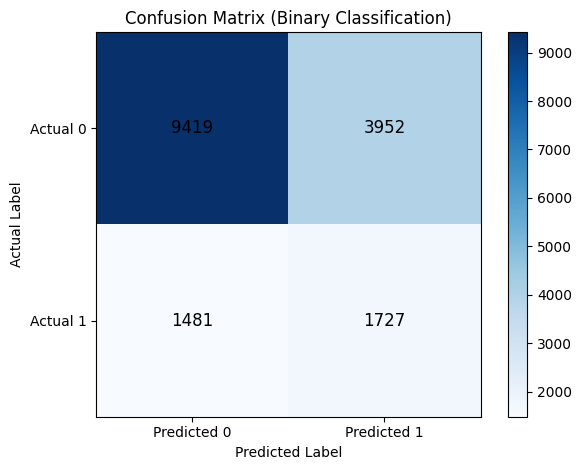

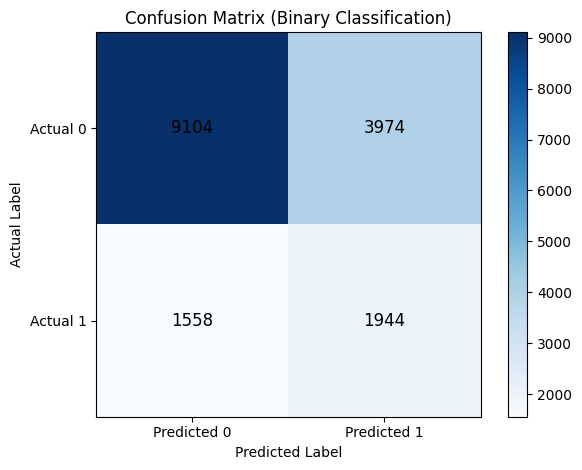

In [286]:
confusion_matrix(y_val_numpy, y_pre_val)
confusion_matrix(y_test_numpy, y_pre_test)

# Pytorch Implementation Of Neural Network

In [298]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve, auc,confusion_matrix
from sklearn.preprocessing import StandardScaler

### Z-Score Normalization

In [288]:
# converting the x and y in numpy
x=x.to_numpy()
y=y.to_numpy()

In [289]:
print(y.shape)
y=y.reshape(-1,1)
print(y.shape)

(110527,)
(110527, 1)


In [290]:
# Applying Z-score Normalization
x_mean=x.mean(axis=0)
x_std=x.std(axis=0)
x=(x-x_mean)/x_std

In [291]:
# Converting the numpy in tensor
x_tensor=torch.tensor(x,dtype=torch.float32)
y_tensor=torch.tensor(y,dtype=torch.float32)

In [292]:
dataset=TensorDataset(x_tensor,y_tensor)

#Dividing in train ,validation , test
train_s=int(len(dataset)*0.7)
val_s=int(len(dataset)*0.15)
test_s=len(dataset)-train_s-val_s

train_data , val_data, test_data = random_split(dataset, [train_s, val_s, test_s])

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64)
test_loader = DataLoader(test_data, batch_size=64)

In [293]:
class No_Show_Model(nn.Module):
    def __init__(self):
        super(No_Show_Model, self).__init__()
        self.fc1 = nn.Linear(10, 25)
        self.fc2 = nn.Linear(25, 15)
        self.out = nn.Linear(15, 1)

        # He Initialization
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='relu')
        nn.init.xavier_normal_(self.out.weight)  # Sigmoid prefers Xavier

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.out(x))
        return x


In [294]:
model = No_Show_Model()
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [295]:
epochs = 200
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")


Epoch 1/200, Loss: 771.7249
Epoch 2/200, Loss: 593.7235
Epoch 3/200, Loss: 580.6584
Epoch 4/200, Loss: 575.5275
Epoch 5/200, Loss: 572.1751
Epoch 6/200, Loss: 569.7424
Epoch 7/200, Loss: 567.9395
Epoch 8/200, Loss: 566.5162
Epoch 9/200, Loss: 565.3084
Epoch 10/200, Loss: 564.3360
Epoch 11/200, Loss: 563.4260
Epoch 12/200, Loss: 562.6159
Epoch 13/200, Loss: 561.9138
Epoch 14/200, Loss: 561.2281
Epoch 15/200, Loss: 560.5965
Epoch 16/200, Loss: 560.0467
Epoch 17/200, Loss: 559.4541
Epoch 18/200, Loss: 558.9944
Epoch 19/200, Loss: 558.5396
Epoch 20/200, Loss: 558.1137
Epoch 21/200, Loss: 557.7346
Epoch 22/200, Loss: 557.3840
Epoch 23/200, Loss: 557.0425
Epoch 24/200, Loss: 556.7097
Epoch 25/200, Loss: 556.3779
Epoch 26/200, Loss: 556.0414
Epoch 27/200, Loss: 555.7796
Epoch 28/200, Loss: 555.4394
Epoch 29/200, Loss: 555.1359
Epoch 30/200, Loss: 554.9324
Epoch 31/200, Loss: 554.6279
Epoch 32/200, Loss: 554.4013
Epoch 33/200, Loss: 554.1370
Epoch 34/200, Loss: 553.9669
Epoch 35/200, Loss: 553

In [299]:
def evaluate_model(loader):
    model.eval()
    y_true = []
    y_pred = []
    y_scores = []

    with torch.no_grad():
        for X_batch, y_batch in loader:
            output = model(X_batch)
            y_scores.extend(output.squeeze().numpy())
            y_pred.extend((output > 0.25).int().squeeze().numpy())
            y_true.extend(y_batch.squeeze().numpy())

    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    pr_auc = auc(recall, precision)
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    return acc, f1, pr_auc


In [300]:
val_acc, val_f1, val_pr_auc = evaluate_model(val_loader)
test_acc, test_f1, test_pr_auc = evaluate_model(test_loader)

print("\nValidation Set:")
print(f"Accuracy: {val_acc:.4f}, F1 Score: {val_f1:.4f}, PR-AUC: {val_pr_auc:.4f}")

print("\nTest Set:")
print(f"Accuracy: {test_acc:.4f}, F1 Score: {test_f1:.4f}, PR-AUC: {test_pr_auc:.4f}")


Confusion Matrix:
[[8674 4612]
 [1097 2196]]
Confusion Matrix:
[[8499 4692]
 [1125 2264]]

Validation Set:
Accuracy: 0.6556, F1 Score: 0.4348, PR-AUC: 0.3506

Test Set:
Accuracy: 0.6492, F1 Score: 0.4377, PR-AUC: 0.3606
